![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

# 🕵️ Crime Data Analysis

In this notebook, we will explore the **crimes.csv** dataset to uncover important patterns such as:

1. Which hour of the day has the highest frequency of crimes?  
2. Which area experiences the most night crimes (10 PM – 3:59 AM)?  
3. How many crimes are committed against victims in different age groups?  

We will use `pandas`, `matplotlib`, and `seaborn` for our analysis and visualization.


In [2]:
# 📦 Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
crimes = pd.read_csv("data/crimes.csv", dtype={"TIME OCC": str})
crimes.head()


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


## ⏰ Step 1: Extract Crime Hours  
The `TIME OCC` column stores crime times in HHMM format.  
We will extract the first two digits to get the **hour of occurrence** and then analyze the distribution of crimes across hours.


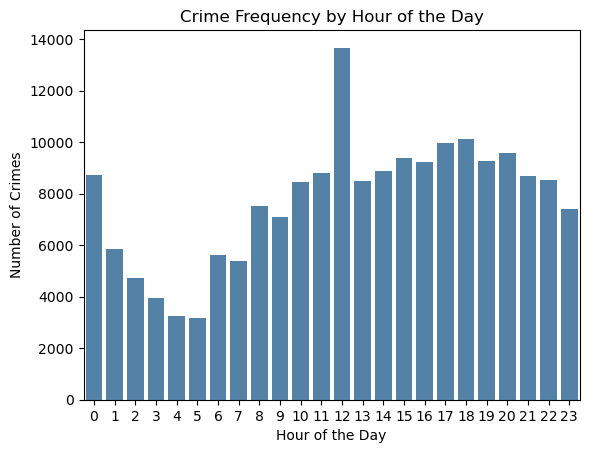

Highest Frequency of crimes occurs at hour: 12


In [3]:
# Extracting the hour from TIME OCC (HHMM format)
crimes['HOUR OCC'] = crimes['TIME OCC'].str[:2].astype(int)

# Visualizing the distribution of crimes by hour
sns.countplot(x="HOUR OCC", data=crimes, color="steelblue")
plt.title("Crime Frequency by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Crimes")
plt.show()

# Finding the hour with the highest frequency of crimes
peak_crime_hour = crimes['HOUR OCC'].value_counts().idxmax()
print(f"Highest Frequency of crimes occurs at hour: {peak_crime_hour}")


## 🌙 Step 2: Analyze Night Crimes  
We define **night crimes** as those committed between **10 PM (22:00) and 3:59 AM**.  
We will filter the dataset for this time window and determine which **area** has the most such crimes.


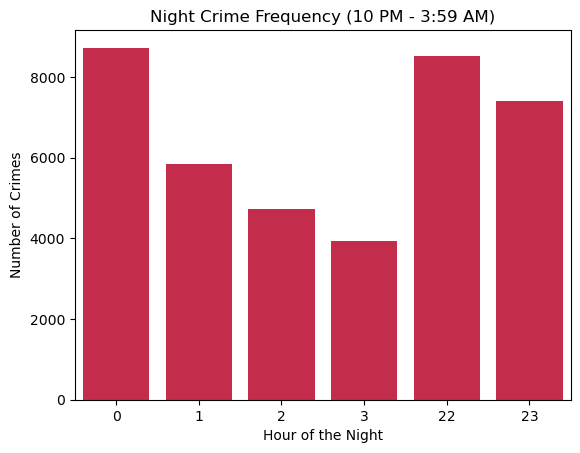

Area with the highest night crimes: Central


In [5]:
# Filtering crimes between 10 PM (22) and 3:59 AM (03)
late_night_crimes = crimes[(crimes['HOUR OCC'] >= 22) | (crimes['HOUR OCC'] <= 3)]

# Visualizing night crime distribution
sns.countplot(x='HOUR OCC', data=late_night_crimes, color="crimson")
plt.title("Night Crime Frequency (10 PM - 3:59 AM)")
plt.xlabel("Hour of the Night")
plt.ylabel("Number of Crimes")
plt.show()

# Counting crimes by area during night hours
area_wise_night_crime = (
    late_night_crimes.groupby("AREA NAME")["HOUR OCC"]
    .count()
    .reset_index(name="Count")
    .sort_values(by="Count", ascending=False)
)

# Finding the area with the most night crimes
peak_night_crime_location = area_wise_night_crime.iloc[0]["AREA NAME"]
print(f"Area with the highest night crimes: {peak_night_crime_location}")


## 👥 Step 3: Victim Age Distribution  
Now, let’s analyze the **age of victims**.  
We will categorize victims into the following age groups:  

- `0-17`  
- `18-25`  
- `26-34`  
- `35-44`  
- `45-54`  
- `55-64`  
- `65+`  

Then, we’ll count the number of crimes against each group.


In [6]:
# Define age bins and labels
labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]
bins = [0, 17, 25, 34, 44, 54, 64, np.inf]

# Grouping victim ages into bins
victim_ages = pd.cut(crimes['Vict Age'], bins=bins, labels=labels).value_counts().sort_index()

# Display results
print("Number of crimes against each age group:")
print(victim_ages)


Number of crimes against each age group:
0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
Name: Vict Age, dtype: int64


# ✅ Final Results

- **Peak Crime Hour**: The hour of day when crimes occur most frequently → `peak_crime_hour`  
- **Peak Night Crime Location**: The area with the highest number of night crimes → `peak_night_crime_location`  
- **Victim Age Groups**: Distribution of crimes against victims in each age group → `victim_ages`
